In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [24]:
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv("/content/ADANIPORTS.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [26]:
data.drop(['Date'], axis=1, inplace=True)

In [27]:
print(data.head())
print(data.shape)
print(data.columns)

       Symbol Series  Prev Close    Open     High    Low   Last   Close  \
0  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0  962.90   
1  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0  893.90   
2  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0  884.20   
3  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0  921.55   
4  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0  969.30   

     VWAP    Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  984.72  27294366  2.687719e+15     NaN             9859619       0.3612  
1  941.38   4581338  4.312765e+14     NaN             1453278       0.3172  
2  888.09   5124121  4.550658e+14     NaN             1069678       0.2088  
3  929.17   4609762  4.283257e+14     NaN             1260913       0.2735  
4  965.65   2977470  2.875200e+14     NaN              816123       0.2741  
(3322, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
    

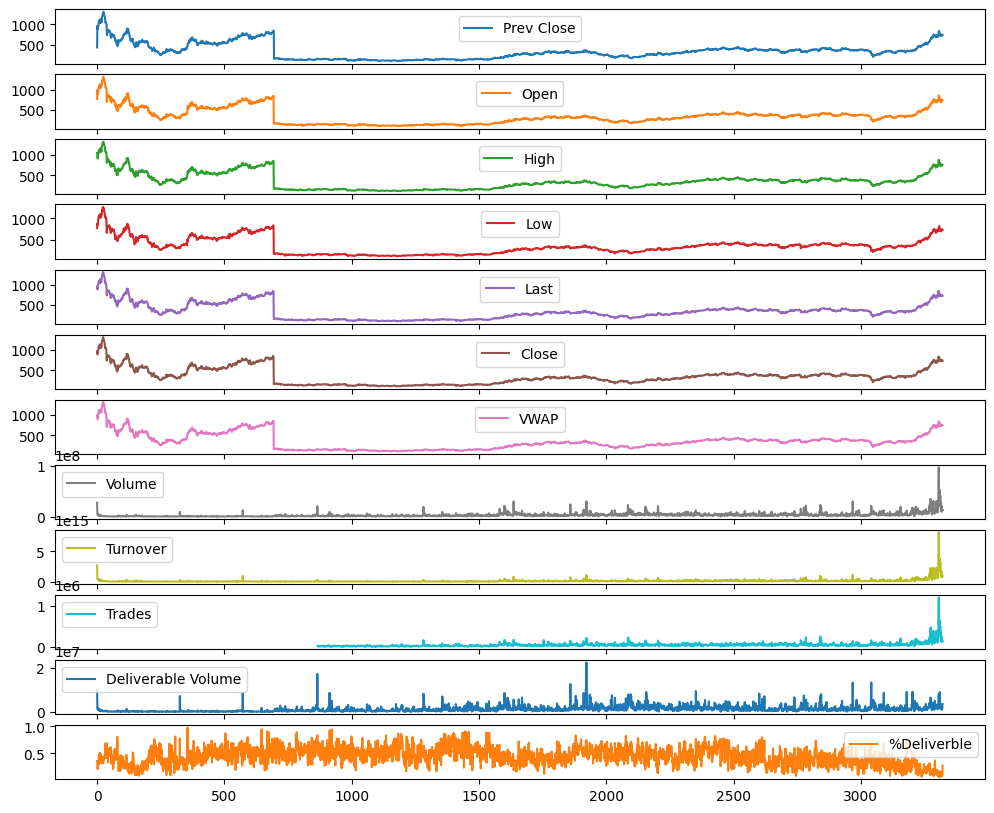

Symbol                   2
Series                   1
Prev Close            2678
Open                  2257
High                  2503
Low                   2482
Last                  2444
Close                 2678
VWAP                  3174
Volume                3322
Turnover              3322
Trades                2417
Deliverable Volume    3322
%Deliverble           2546
dtype: int64

In [28]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [29]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


          Symbol Series  Prev Close    Open     High     Low   Last   Close  \
0     MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00  959.0  962.90   
1     MUNDRAPORT     EQ      962.90  984.00   990.00  874.00  885.0  893.90   
2     MUNDRAPORT     EQ      893.90  909.00   914.75  841.00  887.0  884.20   
3     MUNDRAPORT     EQ      884.20  890.00   958.00  890.00  929.0  921.55   
4     MUNDRAPORT     EQ      921.55  939.75   995.00  922.00  980.0  969.30   
...          ...    ...         ...     ...      ...     ...    ...     ...   
3317  ADANIPORTS     EQ      725.35  733.00   739.65  728.90  729.2  730.75   
3318  ADANIPORTS     EQ      730.75  735.00   757.50  727.35  748.6  749.15   
3319  ADANIPORTS     EQ      749.15  755.00   760.00  741.10  743.4  746.25   
3320  ADANIPORTS     EQ      746.25  753.20   765.85  743.40  746.4  746.75   
3321  ADANIPORTS     EQ      746.75  739.00   759.45  724.50  726.4  730.05   

        VWAP    Volume      Turnover    Trades  Del

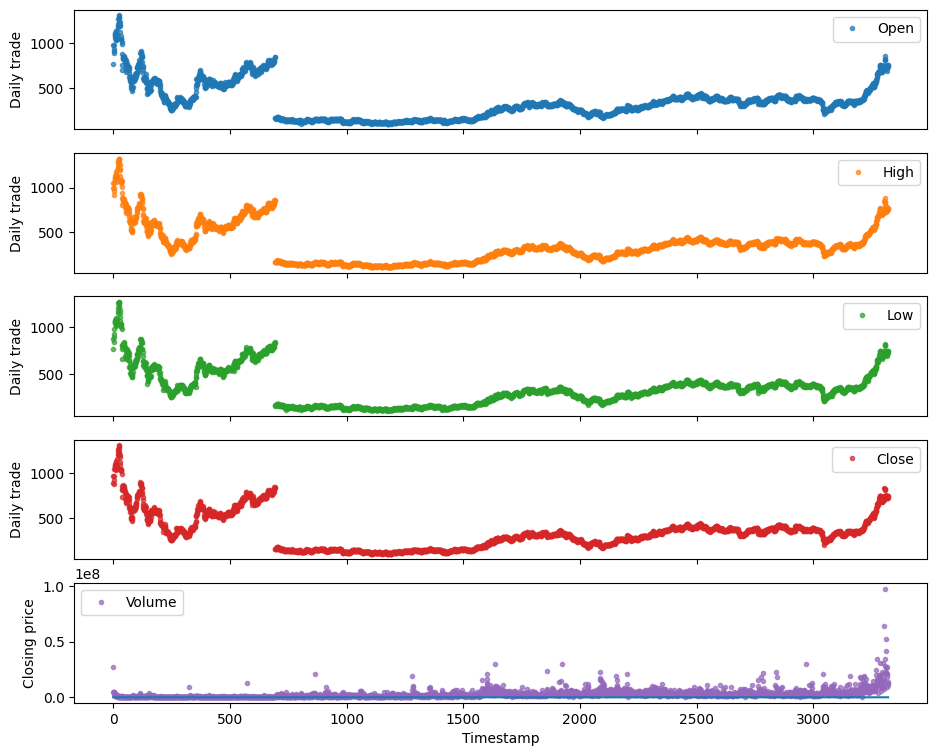

In [30]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [31]:
data.isnull().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

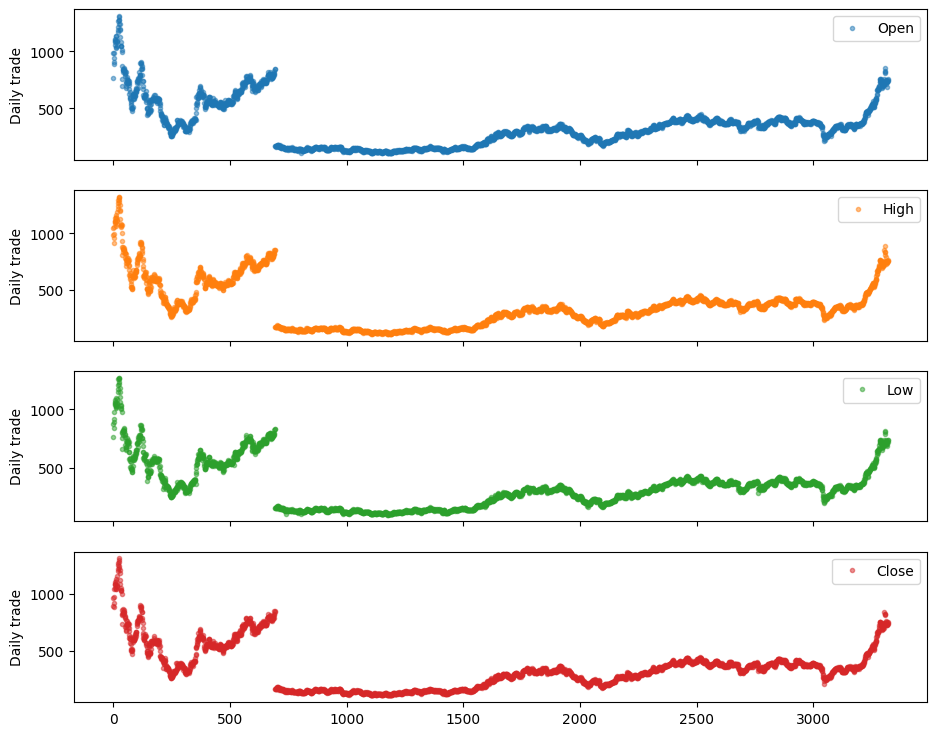

In [32]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

          Symbol Series  Prev Close    Open     High     Low   Last   Close  \
0     MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00  959.0  962.90   
1     MUNDRAPORT     EQ      962.90  984.00   990.00  874.00  885.0  893.90   
2     MUNDRAPORT     EQ      893.90  909.00   914.75  841.00  887.0  884.20   
3     MUNDRAPORT     EQ      884.20  890.00   958.00  890.00  929.0  921.55   
4     MUNDRAPORT     EQ      921.55  939.75   995.00  922.00  980.0  969.30   
...          ...    ...         ...     ...      ...     ...    ...     ...   
3317  ADANIPORTS     EQ      725.35  733.00   739.65  728.90  729.2  730.75   
3318  ADANIPORTS     EQ      730.75  735.00   757.50  727.35  748.6  749.15   
3319  ADANIPORTS     EQ      749.15  755.00   760.00  741.10  743.4  746.25   
3320  ADANIPORTS     EQ      746.25  753.20   765.85  743.40  746.4  746.75   
3321  ADANIPORTS     EQ      746.75  739.00   759.45  724.50  726.4  730.05   

        VWAP    Volume      Turnover    Trades  Del

,count,mean,std,min,25%,50%,75%,max
Prev Close,3322.0,3.441143e+02,1.929369e+02,1.080000e+02,1.643125e+02,3.247000e+02,4.009125e+02,1.307450e+03
Open,3322.0,3.447630e+02,1.936200e+02,1.080000e+02,1.648500e+02,3.257500e+02,4.010000e+02,1.310250e+03
High,3322.0,3.516080e+02,1.986178e+02,1.104500e+02,1.680000e+02,3.312750e+02,4.071875e+02,1.324000e+03
Low,3322.0,3.375320e+02,1.886766e+02,1.056500e+02,1.616000e+02,3.198500e+02,3.950000e+02,1.270000e+03
Last,3322.0,3.442395e+02,1.931878e+02,1.080000e+02,1.640750e+02,3.250000e+02,4.009125e+02,1.308000e+03
Close,3322.0,3.442016e+02,1.930459e+02,1.080000e+02,1.643125e+02,3.247000e+02,4.009125e+02,1.307450e+03
VWAP,3322.0,3.448532e+02,1.938413e+02,1.083400e+02,1.648550e+02,3.257650e+02,4.006075e+02,1.302150e+03
Volume,3322.0,2.954564e+06,4.104227e+06,1.236600e+04,7.493682e+05,2.007292e+06,3.636883e+06,9.771788e+07
Turnover,3322.0,1.070144e+14,2.625564e+14,2.415857e+11,1.817650e+13,5.836041e+13,1.158526e+14,8.160988e+15
Trades,2456.0,4.492259e+04,5.023124e+04,3.660000e+02,2.083200e+04,3.588150e+04,5.336875e+04,1.205984e+06


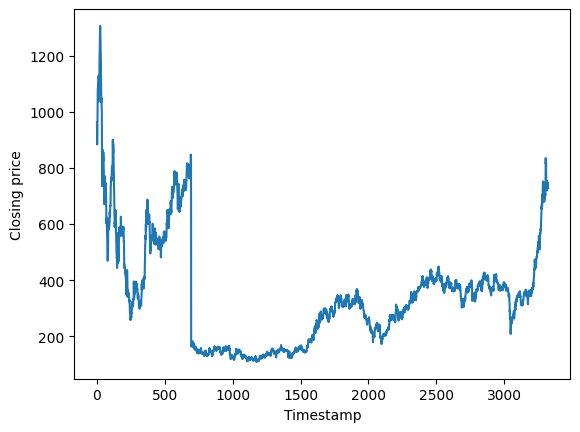

In [33]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [34]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2576
644


In [35]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
41/41 [==============================] - 4s 22ms/step - loss: 0.0495 - mse: 0.0495 - mae: 0.1418 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0840
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0563 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0430
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0426 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0356
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0379 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0317
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0351 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0300
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0333 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0292
Epoch 7/100
41/41 [==

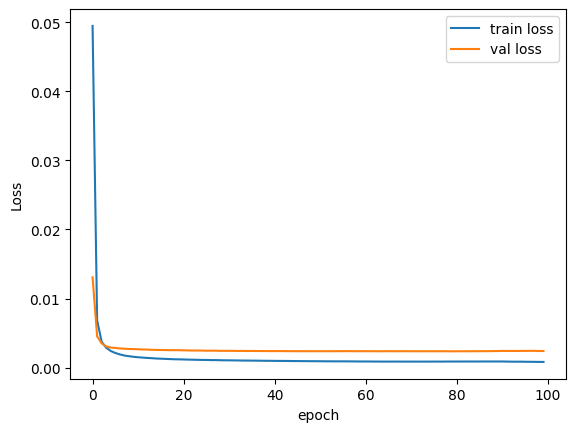

In [36]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

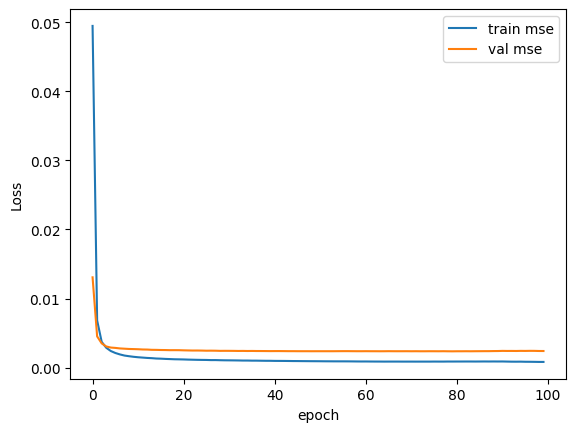

In [37]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

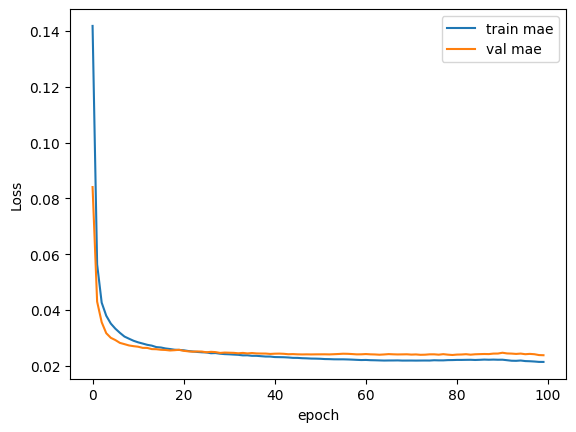

In [38]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 16)             7488      
                                                                 
 lstm_3 (LSTM)               (None, 32)                6272      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 activation_4 (Activation)   (None, 64)               

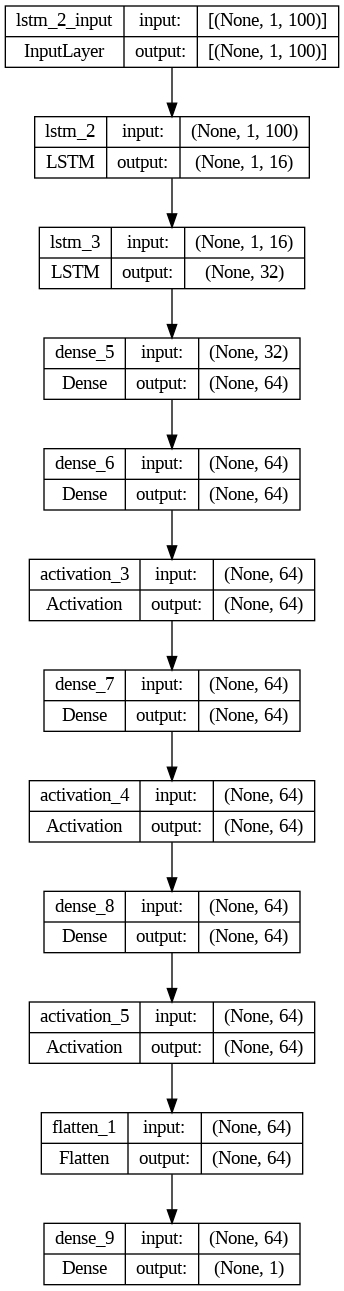

In [39]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [40]:
model.evaluate(test_X, test_Y)

21/21 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0238


[0.00240179430693388, 0.00240179430693388, 0.02376362308859825]

In [41]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.972251
R2 Score: 0.972225
Max Error: 0.967157


21/21 [==============================] - 0s 1ms/step


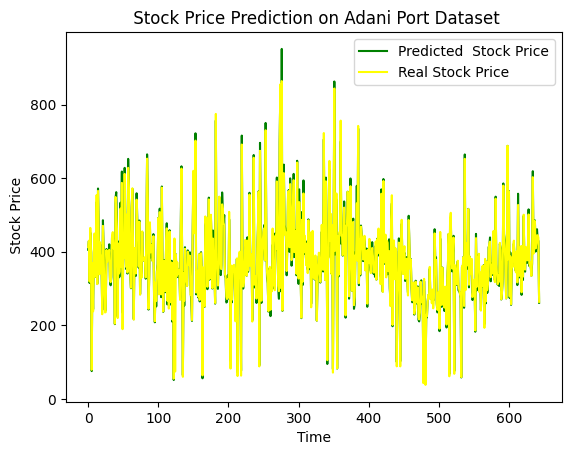

In [42]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on Adani Port Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

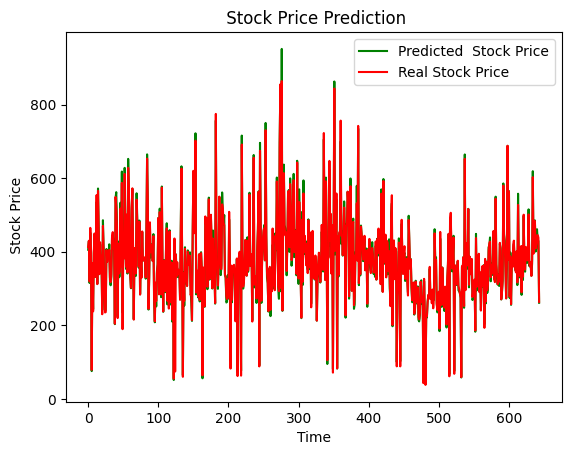

In [43]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [44]:
predicted

array([[405.40787 ],
       [429.28848 ],
       [315.02563 ],
       [451.81427 ],
       [353.77805 ],
       [ 75.54382 ],
       [365.90857 ],
       [243.45233 ],
       [398.27374 ],
       [424.03882 ],
       [331.4532  ],
       [394.951   ],
       [535.16156 ],
       [313.11658 ],
       [571.9101  ],
       [457.6449  ],
       [355.79752 ],
       [419.94357 ],
       [353.87747 ],
       [363.68964 ],
       [241.75624 ],
       [485.66397 ],
       [408.5695  ],
       [279.60486 ],
       [239.41777 ],
       [241.16438 ],
       [407.32697 ],
       [385.98062 ],
       [396.01822 ],
       [386.55756 ],
       [420.20444 ],
       [324.19156 ],
       [308.81958 ],
       [331.52393 ],
       [443.38284 ],
       [444.17776 ],
       [430.54132 ],
       [399.63855 ],
       [203.19864 ],
       [546.8737  ],
       [562.0066  ],
       [484.2631  ],
       [223.53319 ],
       [427.61838 ],
       [330.43646 ],
       [333.62695 ],
       [533.33466 ],
       [375.5

In [45]:
test_label

array([[412.7       ],
       [429.90083183],
       [319.03697674],
       [464.91696447],
       [394.02261048],
       [ 78.95308642],
       [368.6747413 ],
       [237.8281097 ],
       [399.45205479],
       [449.70433996],
       [331.8269698 ],
       [400.84696423],
       [554.18831388],
       [311.93192415],
       [565.32957516],
       [442.47619048],
       [338.94532819],
       [425.73581421],
       [353.4882156 ],
       [388.89163857],
       [230.06735948],
       [470.277791  ],
       [403.45172886],
       [297.86214383],
       [234.91531197],
       [235.93215969],
       [404.79498208],
       [372.5704154 ],
       [391.96528262],
       [383.67292225],
       [405.26477024],
       [330.16225854],
       [317.35145151],
       [339.37897782],
       [441.2741386 ],
       [453.36249569],
       [409.60804079],
       [412.19900241],
       [204.29704864],
       [548.84294203],
       [523.39634787],
       [463.45357319],
       [219.69180122],
       [422

In [46]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

     Actual Price  Predicted Price
0      412.700000       405.407867
1      429.900832       429.288483
2      319.036977       315.025635
3      464.916964       451.814270
4      394.022610       353.778046
..            ...              ...
639    421.825747       407.985931
640    444.212116       461.256958
641    445.044753       432.096771
642    438.255848       429.414093
643    263.788573       261.226990

[644 rows x 2 columns]


In [47]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+-----+--------------------+--------------------+
|     |    Actual Price    |  Predicted Price   |
+-----+--------------------+--------------------+
|  0  |       412.7        | 405.4078674316406  |
|  1  | 429.90083182873354 | 429.2884826660156  |
|  2  | 319.03697674418606 |  315.025634765625  |
|  3  | 464.91696447340763 | 451.81427001953125 |
|  4  | 394.0226104830421  | 353.7780456542969  |
|  5  |  78.9530864197531  |  75.5438232421875  |
|  6  | 368.6747412982126  | 365.9085693359375  |
|  7  | 237.82810969637612 | 243.45233154296875 |
|  8  | 399.45205479452056 | 398.27374267578125 |
|  9  | 449.70433996383366 |  424.038818359375  |
| 10  |  331.826969802152  | 331.45318603515625 |
| 11  | 400.84696422710863 | 394.95098876953125 |
| 12  | 554.1883138780804  | 535.1615600585938  |
| 13  | 311.93192415293754 | 313.1165771484375  |
| 14  | 565.3295751633987  | 571.9100952148438  |
| 15  | 442.4761904761905  | 457.6448974609375  |
| 16  | 338.94532818532815 | 355.7975158691406  |


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 16)             7488      
                                                                 
 lstm_3 (LSTM)               (None, 32)                6272      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 activation_4 (Activation)   (None, 64)               

In [49]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))